In [1]:
from ipywidgets import interact, interact_manual, HBox, VBox
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visualization import core, plots
import utils

/Users/joekasper/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joekasper/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joekasper/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joekasper/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

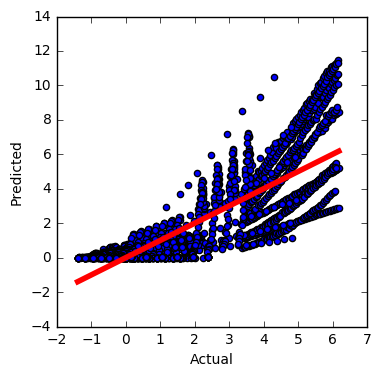

In [2]:
data_file = widgets.Text(description='Dataset',value='datasets/inputdata.xlsx',disabled=False)
model_select = widgets.Dropdown(options=core.model_types(),value='LASSO',description='Model:',disabled=False)
test_withheld = widgets.FloatText(value=20,description='% Test',disabled=False,color='black',width='130px')
save_file = widgets.Text(description='Save Folder:',placeholder='model_folder')
save_toggle = widgets.Checkbox(description='Save?',value=True,disabled=False,)
run_button = widgets.Button(description='Train Model')
save_button = widgets.Button(description='Save Model')

obj_ = [None]
mod_data_ = [None,None]
def run_event(b):
    clear_output()
    obj, X, y = utils.train_model(model_select.value,data_file.value,float(test_withheld.value))
    obj_[0] = obj #save variable outside scope
    mod_data_[0] = X
    mod_data_[1] = y
    my_plot = plots.parity_plot(y,obj.predict(X))
    plt.show(my_plot)
    if (not save_toggle.value):
        gui_1.children = [HBox(items1),HBox(items2)]
    else:
        utils.save_model(obj,X,y)
    
def save_event(b):
    utils.save_model(obj_[0],X=mod_data_[0],y=mod_data_[1],dirname=save_file.value)
    
run_button.on_click(run_event)
save_button.on_click(save_event)
items1 = [data_file,test_withheld,model_select,run_button,save_toggle]
items2 = [save_file,save_button]
gui_1 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui_1.children = [HBox(items1)]
display(gui_1)

16
0
CC(C(c1ccccc1)O)NC.Cl
O


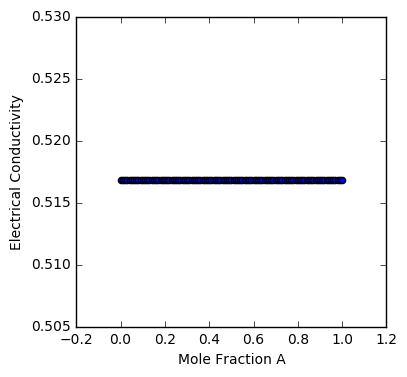

In [15]:
A_list,A_smiles,B_list,B_smiles = core.read_SMILES()
model_dir = widgets.Text(description='Model:',placeholder='model_folder')
load_button = widgets.Button(description='Load Model')    
a_select = widgets.Dropdown(options=A_list,description='A: ',width='500px')
b_select = widgets.Dropdown(options=B_list,description='B: ',width='450px')
temp_slider = widgets.IntSlider(value=298,min=100,max=400,step=1,orientation='horizontal',description='Temp (K)')
p_slider = widgets.IntSlider(value=100,min=5,max=400,step=1,orientation='horizontal',description='Pressure (kPa)')

mod_obj_ = [None]
X_ = [None]
y_ = [None]
def load_event(b):
    clear_output()
    gui2.children = [HBox([model_dir,load_button]),HBox([temp_slider,p_slider]),HBox([a_select,b_select])]
    obj,X,y = utils.read_model(model_dir.value)
    mod_obj_[0] = obj
    X_[0] = X
    y_[0] = y
    replot()
    
def replot(event=None):
    clear_output()
    a_idx = A_list.index(a_select.value)
    print(a_idx)
    b_idx = B_list.index(b_select.value)
    print(b_idx)
    print(A_smiles[a_idx])
    print(B_smiles[b_idx])
    x_vals,y_vals = utils.predict_model(A_smiles[a_idx],B_smiles[b_idx],mod_obj_[0],temp_slider.value,p_slider.value)
    my_plot = plots.mol_fraction_plot(x_vals,y_vals)
    plt.show(my_plot)
    
gui2 = VBox(layout=widgets.Layout(width='95%',display='inline-flex'))
gui2.children = [HBox([model_dir,load_button])]
display(gui2)
#temp_slider.observe(replot)
#p_slider.observe(replot)
a_select.observe(replot)
b_select.observe(replot)

load_button.on_click(load_event)